In [9]:
# 宣告大量陣列 and read file
# original format: tC_m_n_m2
base = 2

#format: tensor_M_M2
for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):
        M=4*pow(base, m)
        #for n in range (0, 6):
            #N=1024*pow(base, n)
        print('t_tot_'+str(M)+'_'+str(M2))
        locals()['t_tot_'+str(M)+'_'+str(M2)] = []
        locals()['t_upd_'+str(M)+'_'+str(M2)] = []
        locals()['t_jud_'+str(M)+'_'+str(M2)] = []
     

    #read file
for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):#放M的大小, 4
        M=4*pow(base, m)
        for n in range (0, 1):#放N的大小, 1024
            N=8192*pow(base, n)
            infile = open("tC_"+str(M)+'_'+str(N)+'_'+str(M2)+".out", 'r')
            #line1: avg time
            line = infile.readline()
            words = line.split()
            #print('t_tot_'+str(M)+'_'+str(M2))
            locals()['t_tot_'+str(M)+'_'+str(M2)].append(words[3])
            
            #line2 and 3: gemm or judge
            for l in range (0, 2):
                line = infile.readline()
                words = line.split()
                a = 0 #用來判斷有沒有找到judge
                fillin = words[1]
                for k in range(0, len(words)):
                    if(words[k] == 'judge_flipping_com(__half*,'):
                        #print(words[1])
                        locals()['t_jud_'+str(M)+'_'+str(M2)].append(fillin)
                        a = 1
                if a == 0:
                    locals()['t_upd_'+str(M)+'_'+str(M2)].append(fillin)                  


# remove the comma    



#format: tensor_M_M2
for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):
        M=4*pow(base, m)
        locals()['t_tot_'+str(M)+'_'+str(M2)] = [x.replace(',', '') for x in locals()['t_tot_'+str(M)+'_'+str(M2)]]
        locals()['t_upd_'+str(M)+'_'+str(M2)] = [x.replace(',', '') for x in locals()['t_upd_'+str(M)+'_'+str(M2)]]
        locals()['t_jud_'+str(M)+'_'+str(M2)] = [x.replace(',', '') for x in locals()['t_jud_'+str(M)+'_'+str(M2)]]

        
#change to ms, and round to 2 place


#format: tensor_M_M2
for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):
        M=4*pow(base, m)
        for i in range(0, len(locals()['t_upd_'+str(M)+'_'+str(M2)]), 1):
            locals()['t_upd_'+str(M)+'_'+str(M2)][i] = round(float(locals()['t_upd_'+str(M)+'_'+str(M2)][i])/1000000, 3)
            locals()['t_jud_'+str(M)+'_'+str(M2)][i] = round(float(locals()['t_jud_'+str(M)+'_'+str(M2)][i])/1000000, 3)

  
    #Check:
'''
print(t_tot_4_256)
print(t_jud_4_256)
print(t_upd_4_256)

print(t_tot_8_256)
print(t_jud_8_256)
print(t_upd_8_256)

print(t_tot_16_256)
print(t_jud_16_256)
print(t_upd_16_256)

print(t_tot_4_256)
print(t_jud_4_256)
print(t_upd_4_256)

print(t_tot_64_256)
print(t_jud_64_256)
print(t_upd_64_256)
'''

print(t_tot_128_256)
print(t_jud_128_256)
print(t_upd_128_256)

'''
print(t_tot_256_256)
print(t_jud_256_256)
print(t_upd_256_256)

print(t_tot_512_256)
print(t_jud_512_256)
print(t_upd_512_256)
'''

   

t_tot_4_16
t_tot_8_16
t_tot_16_16
t_tot_32_16
t_tot_64_16
t_tot_128_16
t_tot_256_16
t_tot_512_16
t_tot_4_32
t_tot_8_32
t_tot_16_32
t_tot_32_32
t_tot_64_32
t_tot_128_32
t_tot_256_32
t_tot_512_32
t_tot_4_64
t_tot_8_64
t_tot_16_64
t_tot_32_64
t_tot_64_64
t_tot_128_64
t_tot_256_64
t_tot_512_64
t_tot_4_128
t_tot_8_128
t_tot_16_128
t_tot_32_128
t_tot_64_128
t_tot_128_128
t_tot_256_128
t_tot_512_128
t_tot_4_256
t_tot_8_256
t_tot_16_256
t_tot_32_256
t_tot_64_256
t_tot_128_256
t_tot_256_256
t_tot_512_256
t_tot_4_512
t_tot_8_512
t_tot_16_512
t_tot_32_512
t_tot_64_512
t_tot_128_512
t_tot_256_512
t_tot_512_512
t_tot_4_1024
t_tot_8_1024
t_tot_16_1024
t_tot_32_1024
t_tot_64_1024
t_tot_128_1024
t_tot_256_1024
t_tot_512_1024
['0.369863']
[277.329]
[84.875]


'\nprint(t_tot_256_256)\nprint(t_jud_256_256)\nprint(t_upd_256_256)\n\nprint(t_tot_512_256)\nprint(t_jud_512_256)\nprint(t_upd_512_256)\n'

In [10]:
#整理一個在N固定下，讀取每一種Ｍ隨著blk_sz變大而改變的三種時間list, for N = 8192

NN = 8192
# 宣告 list
for m in range (0, 8):
    M=4*pow(base, m)
    #for n in range (0, 6):
        #N=1024*pow(base, n)
    locals()['t_tot_'+str(M)] = []
    locals()['t_upd_'+str(M)] = []
    locals()['t_jud_'+str(M)] = []

#read file


for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):
        M=4*pow(base, m)
        infile = open("tC_"+str(M)+'_'+str(NN)+'_'+str(M2)+".out", 'r')
        #line1: avg time
        line = infile.readline()
        words = line.split()
        locals()['t_tot_'+str(M)].append(words[3])

        #line2 and 3: gemm or judge
        for l in range (0, 2):
            line = infile.readline()
            words = line.split()
            a = 0 #用來判斷有沒有找到judge
            fillin = words[1]
            for k in range(0, len(words)):
                if(words[k] == 'judge_flipping_com(__half*,'):
                    #print(words[1])
                    locals()['t_jud_'+str(M)].append(fillin)
                    a = 1
            if a == 0:
                locals()['t_upd_'+str(M)].append(fillin)    
                
# remove the comma    


#format: tensor_M_M2
for m2 in range (0, 7):
    M2=16*pow(base, m2)
    for m in range (0, 8):
        M=4*pow(base, m)
        locals()['t_tot_'+str(M)] = [x.replace(',', '') for x in locals()['t_tot_'+str(M)]]
        locals()['t_upd_'+str(M)] = [x.replace(',', '') for x in locals()['t_upd_'+str(M)]]
        locals()['t_jud_'+str(M)] = [x.replace(',', '') for x in locals()['t_jud_'+str(M)]]

for m in range (0, 8):
    M=4*pow(base, m)
    for l in range(len(t_upd_128)):
        locals()['t_tot_'+str(M)][l] = float(locals()['t_tot_'+str(M)][l]) 
        locals()['t_tot_'+str(M)][l] = round(float(locals()['t_tot_'+str(M)][l])*1000, 5)    #/1000*10, total 10 samples    
        locals()['t_upd_'+str(M)][l] = float(locals()['t_upd_'+str(M)][l]) 
        locals()['t_upd_'+str(M)][l] = round(float(locals()['t_upd_'+str(M)][l])/1000000, 3)
        locals()['t_jud_'+str(M)][l] = float(locals()['t_jud_'+str(M)][l]) 
        locals()['t_jud_'+str(M)][l] = round(float(locals()['t_jud_'+str(M)][l])/1000000, 3)
    
    
'''
print('tot')
print(t_tot_4)
print(t_tot_8)
print(t_tot_16)
print(t_tot_32)
print(t_tot_64)
print(t_tot_128)
print(t_tot_256)
print(t_tot_512)
print('upd')   
print(t_upd_4)
print(t_upd_8)
print(t_upd_16)
print(t_upd_32)
print(t_upd_64)
print(t_upd_128)
print(t_upd_256)
print(t_upd_512)
print('jud')
print(t_jud_4)
print(t_jud_8)
print(t_jud_16)
print(t_jud_32)
print(t_jud_64)
print(t_jud_128)
print(t_jud_256)
print(t_jud_512)
'''

print(t_tot_128)
print(t_upd_128)
print(t_jud_128)



[1001.739, 607.949, 412.323, 340.914, 369.863, 569.127, 1037.551]
[619.704, 335.65, 189.351, 116.403, 84.875, 58.47, 47.475]
[285.309, 222.194, 198.523, 211.38, 277.329, 506.582, 987.855]


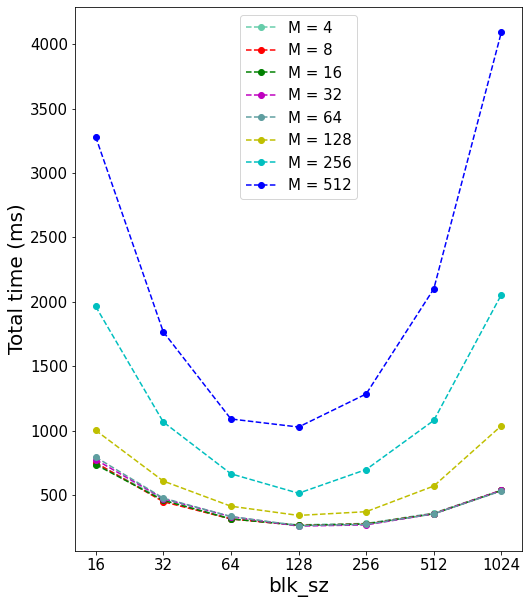

In [11]:
#total time
import numpy as np

x = [16, 32, 64, 128, 256, 512, 1024]
values = range(len(x))

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 15 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

fig, ax = plt.subplots(figsize=(8, 10))

ax.plot(values, t_tot_4, "o--", color = 'mediumaquamarine', label="M = 4")
ax.plot(values, t_tot_8, "or--", label="M = 8")
ax.plot(values, t_tot_16, "og--", label="M = 16")
ax.plot(values, t_tot_32, "om--", label="M = 32")
ax.plot(values, t_tot_64, "o--",color = 'cadetblue', label="M = 64")
ax.plot(values, t_tot_128, "oy--", label="M = 128")
ax.plot(values, t_tot_256, "oc--", label="M = 256")
ax.plot(values, t_tot_512, "ob--", label="M = 512")

ax.set_xlabel(r'blk_sz', fontsize = 20)
ax.set_ylabel('Total time (ms)', fontsize = 20)

plt.xticks(values,x)
#plt.xlim([0, 600])
#plt.ylim([100, 600])
plt.legend()
plt.show()


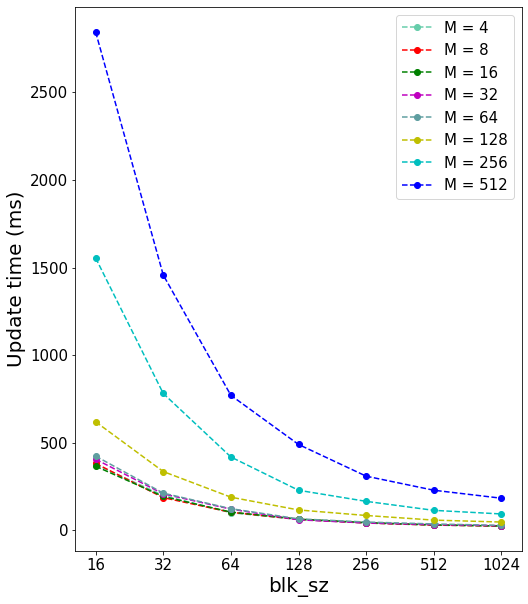

In [12]:
#total time
import numpy as np

x = [16, 32, 64, 128, 256, 512, 1024]
values = range(len(x))

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 15 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

fig, ax = plt.subplots(figsize=(8, 10))

ax.plot(values, t_upd_4, "o--", color = 'mediumaquamarine', label="M = 4")
ax.plot(values, t_upd_8, "or--", label="M = 8")
ax.plot(values, t_upd_16, "og--", label="M = 16")
ax.plot(values, t_upd_32, "om--", label="M = 32")
ax.plot(values, t_upd_64, "o--",color = 'cadetblue', label="M = 64")
ax.plot(values, t_upd_128, "oy--", label="M = 128")
ax.plot(values, t_upd_256, "oc--", label="M = 256")
ax.plot(values, t_upd_512, "ob--", label="M = 512")

ax.set_xlabel(r'blk_sz', fontsize = 20)
ax.set_ylabel('Update time (ms)', fontsize = 20)

plt.xticks(values,x)
#plt.xlim([0, 600])
#plt.ylim([100, 600])
plt.legend()
plt.show()


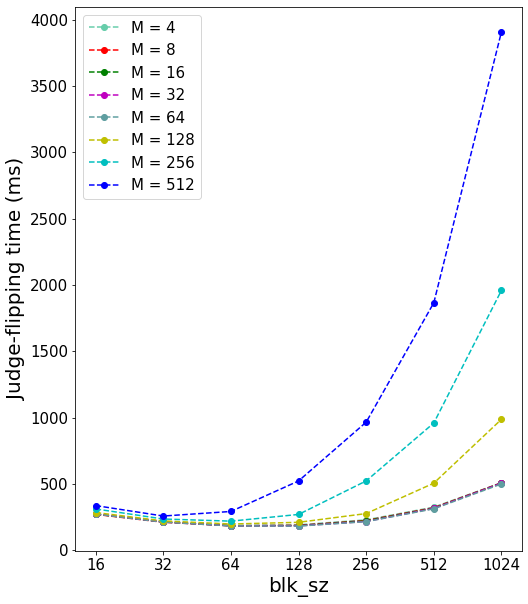

In [13]:
#total time
import numpy as np

x = [16, 32, 64, 128, 256, 512, 1024]
values = range(len(x))

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 15 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

fig, ax = plt.subplots(figsize=(8, 10))

ax.plot(values, t_jud_4, "o--", color = 'mediumaquamarine', label="M = 4")
ax.plot(values, t_jud_8, "or--", label="M = 8")
ax.plot(values, t_jud_16, "og--", label="M = 16")
ax.plot(values, t_jud_32, "om--", label="M = 32")
ax.plot(values, t_jud_64, "o--",color = 'cadetblue', label="M = 64")
ax.plot(values, t_jud_128, "oy--", label="M = 128")
ax.plot(values, t_jud_256, "oc--", label="M = 256")
ax.plot(values, t_jud_512, "ob--", label="M = 512")

ax.set_xlabel(r'blk_sz', fontsize = 20)
ax.set_ylabel('Judge-flipping time (ms)', fontsize = 20)

plt.xticks(values,x)
#plt.ylim([0, 600])
plt.legend()
plt.show()
